# 결정트리

## 개념

- 데이터에 들어있는 규칙을 학습을 통해 찾고, **트리 기반**으로 **분류의 규칙을 만들어 내는 알고리즘이다**
- 성능
  - 어떤 기준의 규칙인가(규칙을 만드는 룰, 임계값)
  - 분류를 하는 규칙 어떻게 효율적으로 배치하는가
  - **깊이**

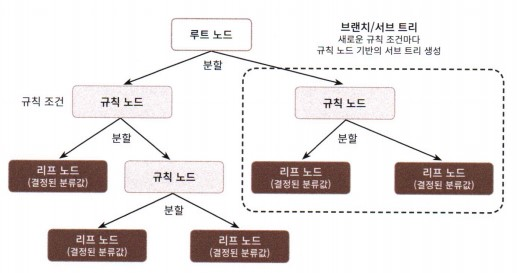

In [4]:
from IPython.display import Image
Image('/content/drive/MyDrive/today/분류_결정트리.jpg')

```
- 전체 데이터를 특정 노드에서 분류가 되어 전체적으로 지도학습의 분류 주제를 구현하는 알고리즘
- 노드
  - 노드 : 분기점, 가지의 맨끝점, 시작점
  - 루트노드 : 데이터의 분기되는 시작점
  - 규칙노드 : 규칙(룰)이 존재, 룰에 의해서 데이터를 분기한다.피쳐(특성, 독립변수)들을 결합, 조합하여 규칙을 생성하고, 그 기준으로 분기를 하는 노드, 결과물은 브랜치가 되어서 서브트리가 만들어진다
  - 리프노드 : 더 이상의 분기점이 없다(끝) -> 어떤 결정된 클래스(종속변수)값을 가진다
- 브랜치/서브트리 : 새로운 규칙이 조건에 의해서 생성되면, 서브트리가 생겼다 표현한다

- depth(깊이) : 깊을수록, 정확도는 올라가겠지만, 성능저하의 원인, 과적합의 원인 -> 적절한 깊이감에 대한 조절 -> 이를 처리하기 위한 임계값 필요
- 목표 포인트
  - 데이터가 균일하게 분류되도록 분할 처리하는 것
  - 데이터의 균일성을 스케일을 통해서 처리하는 것
  - 과적합에 대한 대비, 깊이감 조절, 데이터의 쏠림을 방지
```


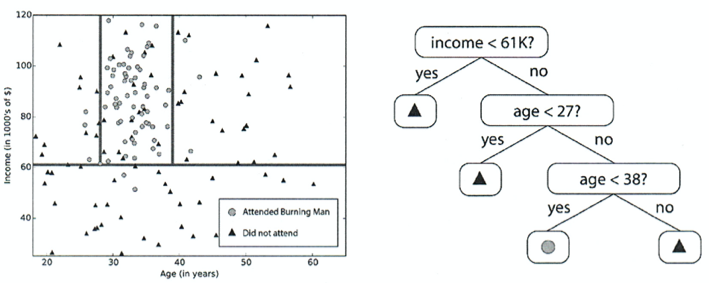

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/res (1)/ml-의사결정트리.png')

## 적용

In [5]:
# 1. 모듈 가져오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 하이퍼 파라미터

- criterion
  - 개요
    - **결정트리 알고리즘**에서 **데이터의 균일성**(정보의 균일성)이 높게 되도록 데이터 세트가 선택되게 **규칙을 만드는 것이 중요**하다

  - 지표(방법)
    - "entropy"
      - 엔트로피를 이용한 정보이득지수(information gain)
      - 혼잡도
      - 엔트로피는 주어진 데이터 집합의 혼잡도를 표현
      - 서로 다른 데이터들이 뒤섞여 있다면 엔트로피가 높다
      - 같은 데이터들이 모여 있으면 엔트로피가 낮다
      - 정보이득지수 = 1 - 엔트로피지수값
        - **판단 : 정보이득지수가 임계값(설정값)보다 크다면 규칙노드로 판단이 된다 -> 브랜치(가지치기) 실행**

    - "gini"
      - 불평등 지수(경제학에서표현)에서 나오는 지표
      - 0: 가장 평등
      - 1: 1에 가까울수록 불평등해진다
      - 데이터(분류된 데이터 기준)가 다양하면 평등, 특정값에 쏠리면 불평등

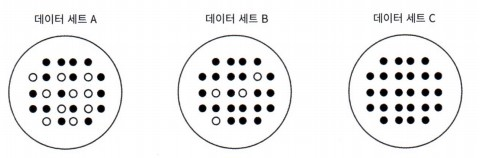

In [6]:
Image('/content/drive/MyDrive/today/분류_결정트리2.jpg')
# 엔트로피 관점에서 해석
  # A SET : 여러정보가 섞여있다 -> 혼탁
  # C SET : 정보가 균일하다 -> 특정 데이터로 쏠려있다
# 지니 계수
  # A SET : 여러 데이터가 섞여있다 -> 평등하다
  # C SET : 특정 데이터가 균일하다(특정 데이터로 쏠려있다) -> 불평등하다 => 1로 수렴     

In [ ]:
# 2. 알고리즘 생성
'''
criterion : 규칙 노드는 만드는 판단기준 엔트로피 혹은 지니계수 사용하는 기준만 지정, 임계값 접근은 
            파라미터에서 미지원 -> 튜닝 포인트는 엔트로피 혹은 지니 둘중 어느쪽에서 더 성능이 
            나오는지 확인
'''
clf = DecisionTreeClassifier( )

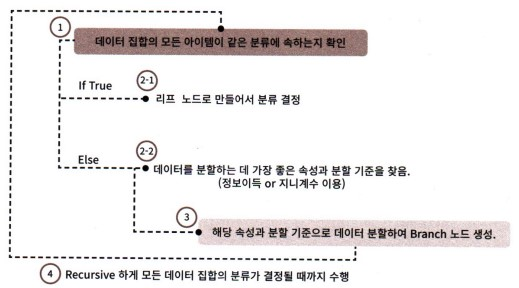

In [7]:
Image('/content/drive/MyDrive/today/분류_결정트리3.jpg')
# 가지치기 원리
# 1번은 노드에 도착했고, 데이터를 살펴보니 모두 같은 것만 남았다 -> 리프노드가 된다(끝)
# 1 -> 2번은 더이상 분류할게 없다 : 리프노드가 되었다
# 1 -> 2-2번은 규칙노드를 만들어야 한다 -> 기준이 필요(지니, 엔트로피 지정)
#   기준 만족하면 브랜치 노드 작동(가지치기 작동)
# 4번은 기준이 만족할 때까지 반복

## 과적합 방지 하이퍼파라미터

- 깊이를 어느 정도 줄것인가?
- 리프노드를 몇개로 갈것인가?
- 규칙노드로 가지치키를 할대 전제 조건을 어떻게 할것인가?

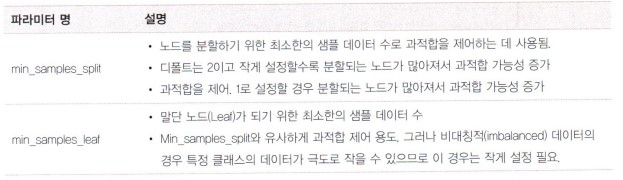

In [8]:
Image('/content/drive/MyDrive/today/분류_결정트리4.jpg')
# min_samples_split
# 규칙노드가 만들어지는 기본 전제 조건으로 몇개의 샘플데이터가 남았을 때 스플릿을 할 것인가
# 값이 작을 수록 튀는 값도 다 잡아낼 수 있고 -> 과적합이 될 것 -> 아주 작게 1을 지양하지 말자
# min_samples_leaf
# 리프노드가 되기위해 해당 노드에서 최소 몇개의 샘플을 가지고 있는가? 설정값
# 최소 이정도 샘플은 들고 있어야 리프 노드가 된다

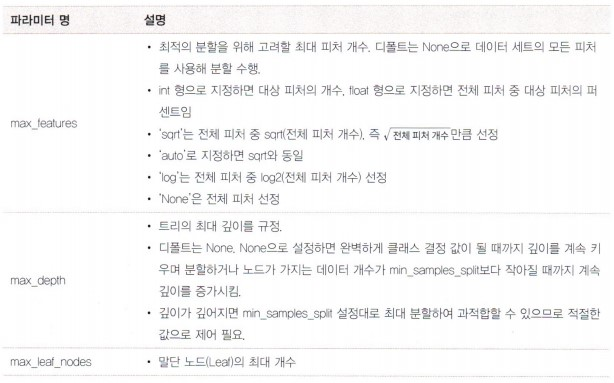

In [9]:
Image('/content/drive/MyDrive/today/분류_결정트리5.jpg')
# 최대 특정 수
# 최대 깊이
# 최대 리프노드 수

In [10]:
# 2. 알고리즘 생성
'''
criterion : 규칙 노드는 만드는 판단기준 엔트로피 혹은 지니계수 사용하는 기준만 지정, 임계값 접근은 
            파라미터에서 미지원 -> 튜닝 포인트는 엔트로피 혹은 지니 둘중 어느쪽에서 더 성능이 
            나오는지 확인
min_samples_split
min_samples_leaf
max_features
max_depth
max_leaf_node
random_state = 알고리즘 생성시 사용하는, 내부에서 사용하는 모든 난수의 씨드 설정
- 고정하면 언제나 동일한 성능을 내는 알고리즘 생성
'''
clf = DecisionTreeClassifier(random_state= 0)
clf

DecisionTreeClassifier(random_state=0)

In [14]:
# 3. 데이터 준비
tmp = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    tmp.data, tmp.target, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape,

((112, 4), (38, 4))

In [15]:
# 4. 훈련
clf.fit( X_train, y_train )

DecisionTreeClassifier(random_state=0)

In [16]:
# 5. 예측 및 성능평가
clf.score( X_test, y_test )

0.9736842105263158

## 결정트리 분기과정
- 결정 트리가 어떤 과정을 거쳐서, 노드를 분류, 생성했는지 시각적으로 확인

In [18]:
from sklearn.tree import export_graphviz
# 모델을 덤프해서 데이터 정답을 같이 표기하여 덤프
export_graphviz(clf, out_file = 'dtree.model',     # 학습된 알고리즘, 파일명
                feature_names= tmp.feature_names,  # 특성 이름
                class_names = tmp.target_names,    # 정답 이름
                filled = True)

In [19]:
# 시각화
import graphviz
# graphviz 라이브러리 활용해서 덤프파일(모델, 정답, 정답의 이름)을 읽어들여서 시각화를 할 수 있다
with open('dtree.model') as f:
  # 텍스트 형태로 읽었다
  mGraph = f.read()


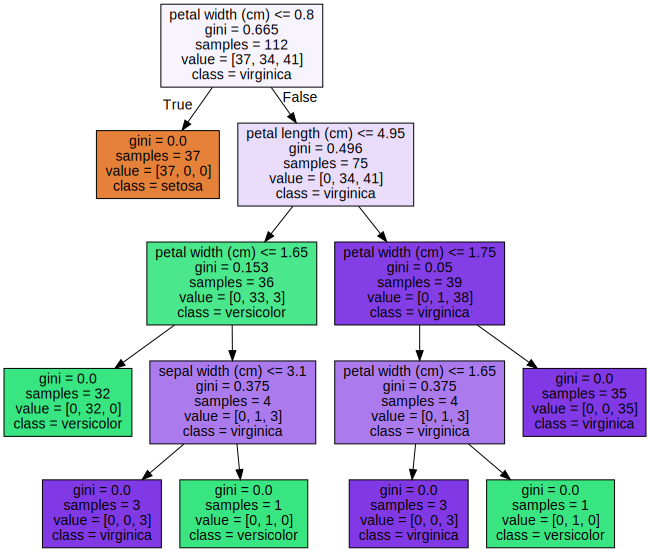

In [20]:
# 시각화
graphviz.Source( mGraph )

- 결정트리 상에 규칙노드들을 체크해 보니, 사용하지 않은 특성(피쳐)가 보인다. 사용비중이 차이가 나는 것이 보인다.
- 결정트리의 분류를 완성할때 피쳐별 기여도가 다르다는 것을 의미
- 시각화를 해서 중요 피쳐를 표현

In [21]:
import seaborn as sns
import numpy as np

In [22]:
clf.feature_importances_

array([0.        , 0.02014872, 0.39927524, 0.58057605])

In [26]:
f1 = np.round( clf.feature_importances_, 3 )
f1

array([0.   , 0.02 , 0.399, 0.581])

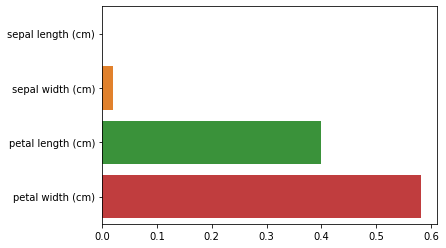

In [27]:
sns.barplot(x = f1, y = tmp.feature_names)
# sepal length는 분류하는데 전혀 기여도가 없다
# 이 컬럼을 제외해도 결정 트리 알고리즘에서는 문제가 없다

## 과적합 처리
- 데이터를 생성해서 사용(범위 데이터로써, 특정 목적을 가지게 생성)
- make_xxxx()

In [34]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
# 더미 데이터 생성
'''
n_samples : 생성되는 전체 데이터 수
n_features : 특성의 총 수, 독립변수의 총개수
n_informative : 독립변수들 중에서 종속변수(정답)와 상관관계가 있는 성분의 수
n_redundant : 독립변수들 중에서 다른 독립변수들과 선형 조합을 나타낼 수 있는 수  
n_classes : 종속변수의 개수 (정답의 수)
n_clusters_per_class : 클래스(정답) 당 클러스터(군집)의 개수
random_state : 데이터 생성시 난수를 사용하며느 그 씨드값을 제시, 미사용 -> 현재시간
'''
X, y = make_classification(n_features= 2, n_redundant = 0, n_informative = 2,
                    n_classes = 3, n_clusters_per_class = 1, random_state = 0)
X.shape, y.shape

((100, 2), (100,))

In [36]:
X[0]

array([ 0.12041909, -1.68941375])

In [37]:
X[:, 0]

array([ 0.12041909,  1.09665605,  0.88426577,  0.95048011,  1.04421447,
        0.50102164,  1.10447379, -2.5077599 , -0.00811816,  0.31338067,
       -0.04687748,  1.20888898,  1.71173001,  1.29670808,  1.24188996,
       -1.78273822, -1.50514147,  0.87163989,  2.53026908,  0.95000368,
       -1.53716448, -2.13650855,  1.01037788,  1.9876467 ,  1.12463497,
       -0.65122279,  0.85144036, -0.10789457, -0.41699944, -0.77993003,
        2.34137626,  0.79625824,  1.3641878 ,  0.04699455,  0.77274433,
       -1.20971021, -1.63281739,  1.79574591,  0.89518388, -2.11213297,
       -1.21815226,  1.23240644,  0.74261606,  2.40620516, -1.68765743,
        1.23567148,  1.08921755, -2.82040545,  0.21654345, -0.276832  ,
        0.28914807,  0.67311496, -0.2415271 ,  1.16816014, -0.27013824,
        1.07961675,  0.74139141, -1.75179327,  0.28268758, -1.35324757,
        1.86752028, -1.54860553, -2.71061298,  0.85041166,  0.86614747,
        1.01341491, -0.85450433,  1.12229408,  0.85144223,  2.18

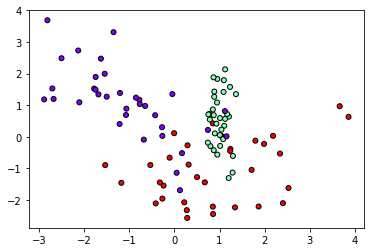

In [39]:
# scatter
# X축 첫번째 값 집합, y축에는 두번째 값 집합 사용
plt.scatter(X[:,0], X[:,1],
            s = 25,
            marker ='o',
            c = y,
            cmap = 'rainbow',
            edgecolors = 'k')
# 결정트리 관점에서 보면
# 청록색 데이터는 바로 분류가 가능하다
# 빨간색, 보라색은 몇번의 규칙노드를 통해서 영역을 쪼갤 수 있다

- 등고선 plot을 이용해서 분포싀 경계를 그릴수 있다
- 어떤  분류 모델이던, 모델, X,y를 넣으면 시각화 할 수 있게 제작
- 최종적으로는 2D로 표현

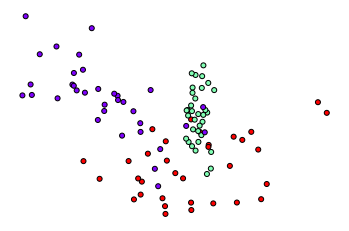

In [42]:
def show_rect_clf_boundary( clf, X, y ):
  '''
    모델을, 이 안에서 학습하여서 그리겟다
    - clf : 분류기, 알고리즘
    - X   : feature data, 특성, 독립변수
    - y   : target data, 정답, 종속변수
  '''
  # 0. 차트 외관에 필요한 요소 준비
  _, ax = plt.subplots()
  # 1. 산포도(산점도) 드로잉
  ax.scatter( X[ :, 0], X[ :, 1], s=25, marker='o', c=y, cmap='rainbow', edgecolors='k',
              clim=( y.min(), y.max() ), zorder=3
             )
  # 2. 차트 외곽 정리
  ax.axis('off')   # 축 정보 삭제
  ax.axis('tight') # 데이터의 분포가 펼쳐졌을 때 빡빡한 형태를 띈다면 여유있게 조절
  
  # 3. 면적(같은 답을 가진 사각 영역에 대한 공간)에 대한 데이터 준비
  # 분류에 대한 경계성 계산 재료 준비

  # 4. 알고리즘 생성(이미 완료됨)
  
  # 5. 학습, 예측
  clf.fit(X,y)
  Z = clf.predict()

  # 6. 등고선 플롯을 그리기 위한 작업(분류된 영역 그리기)
  pass

show_rect_clf_boundary(DecisionTreeClassifier(), X, y)

# 앙상블

## 개념

## 보팅

### 특징, 포인트

### 부트 스크래핑

## 배깅-랜덤포레스트

## 부스팅

### AdaBoost

### GBM

### XGBoost

### LightGBM

## 스태킹

# SVM

## 개념

# KNN

## 개념